In [1]:
import os
import PIL


In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle


In [4]:
import matplotlib.pyplot as plt

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [6]:
from tensorflow.keras.layers import *


In [7]:
from tensorflow.keras.models import Model,load_model
from tensorflow.keras.initializers import glorot_uniform
from tensorflow.keras.utils import plot_model
from IPython.display import display
from tensorflow.keras.optimizers import *
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import *
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint, LearningRateScheduler

In [16]:
os.listdir('./data')

['0', '1', '2', '3', '4']

In [17]:
os.listdir(os.path.join('data','0'))

['resized_resized_resized_resized_10003_left_gaussian_filtered_gaussian_filtered_gaussian_filtered_gaussian_filtered.png',
 'resized_resized_resized_resized_10003_right_gaussian_filtered_gaussian_filtered_gaussian_filtered_gaussian_filtered.png',
 'resized_resized_resized_resized_10007_left_gaussian_filtered_gaussian_filtered_gaussian_filtered_gaussian_filtered.png',
 'resized_resized_resized_resized_10007_right_gaussian_filtered_gaussian_filtered_gaussian_filtered_gaussian_filtered.png',
 'resized_resized_resized_resized_10009_left_gaussian_filtered_gaussian_filtered_gaussian_filtered_gaussian_filtered.png',
 'resized_resized_resized_resized_10009_right_gaussian_filtered_gaussian_filtered_gaussian_filtered_gaussian_filtered.png',
 'resized_resized_resized_resized_1000_left_gaussian_filtered_gaussian_filtered_gaussian_filtered_gaussian_filtered.png',
 'resized_resized_resized_resized_1000_right_gaussian_filtered_gaussian_filtered_gaussian_filtered_gaussian_filtered.png',
 'resized_resi

In [18]:
os.listdir(os.path.join('data','1'))

['resized_resized_resized_resized_10000_aug_0_4851_gaussian_filtered_gaussian_filtered_gaussian_filtered_gaussian_filtered.png',
 'resized_resized_resized_resized_10001_12227_left._original_gaussian_filtered_gaussian_filtered_gaussian_filtered_gaussian_filtered.png',
 'resized_resized_resized_resized_10002_aug_0_8303_gaussian_filtered_gaussian_filtered_gaussian_filtered_gaussian_filtered.png',
 'resized_resized_resized_resized_10003_aug_0_185_gaussian_filtered_gaussian_filtered_gaussian_filtered_gaussian_filtered.png',
 'resized_resized_resized_resized_10004_aug_0_6876_gaussian_filtered_gaussian_filtered_gaussian_filtered_gaussian_filtered.png',
 'resized_resized_resized_resized_10005_aug_0_5404_gaussian_filtered_gaussian_filtered_gaussian_filtered_gaussian_filtered.png',
 'resized_resized_resized_resized_10006_14251_left._original_gaussian_filtered_gaussian_filtered_gaussian_filtered_gaussian_filtered.png',
 'resized_resized_resized_resized_10007_aug_0_7260_gaussian_filtered_gaussian_

In [19]:
os.listdir(os.path.join('data','2'))

['resized_resized_resized_resized_10000_14152_right._original_gaussian_filtered_gaussian_filtered_gaussian_filtered_gaussian_filtered.png',
 'resized_resized_resized_resized_10001_aug_0_9629_gaussian_filtered_gaussian_filtered_gaussian_filtered_gaussian_filtered.png',
 'resized_resized_resized_resized_10002_aug_0_7567_gaussian_filtered_gaussian_filtered_gaussian_filtered_gaussian_filtered.png',
 'resized_resized_resized_resized_10003_aug_0_2555_gaussian_filtered_gaussian_filtered_gaussian_filtered_gaussian_filtered.png',
 'resized_resized_resized_resized_10004_41692_right._original_gaussian_filtered_gaussian_filtered_gaussian_filtered_gaussian_filtered.png',
 'resized_resized_resized_resized_10005_aug_0_4952_gaussian_filtered_gaussian_filtered_gaussian_filtered_gaussian_filtered.png',
 'resized_resized_resized_resized_10006_40354_left._original_gaussian_filtered_gaussian_filtered_gaussian_filtered_gaussian_filtered.png',
 'resized_resized_resized_resized_10007_22586_right._original_gau

In [20]:
os.listdir(os.path.join('data','3'))

['resized_resized_resized_resized_10000_gaussian_filtered_gaussian_filtered_gaussian_filtered_gaussian_filtered.png',
 'resized_resized_resized_resized_10001_gaussian_filtered_gaussian_filtered_gaussian_filtered_gaussian_filtered.png',
 'resized_resized_resized_resized_10002_gaussian_filtered_gaussian_filtered_gaussian_filtered_gaussian_filtered.png',
 'resized_resized_resized_resized_10003_gaussian_filtered_gaussian_filtered_gaussian_filtered_gaussian_filtered.png',
 'resized_resized_resized_resized_10004_gaussian_filtered_gaussian_filtered_gaussian_filtered_gaussian_filtered.png',
 'resized_resized_resized_resized_10005_gaussian_filtered_gaussian_filtered_gaussian_filtered_gaussian_filtered.png',
 'resized_resized_resized_resized_10006_gaussian_filtered_gaussian_filtered_gaussian_filtered_gaussian_filtered.png',
 'resized_resized_resized_resized_10007_gaussian_filtered_gaussian_filtered_gaussian_filtered_gaussian_filtered.png',
 'resized_resized_resized_resized_10008_gaussian_filtere

In [21]:
os.listdir(os.path.join('data','4'))

['resized_resized_resized_resized_10000_aug_0_9112_gaussian_filtered_gaussian_filtered_gaussian_filtered_gaussian_filtered.png',
 'resized_resized_resized_resized_10001_aug_0_4072_gaussian_filtered_gaussian_filtered_gaussian_filtered_gaussian_filtered.png',
 'resized_resized_resized_resized_10002_aug_0_9108_gaussian_filtered_gaussian_filtered_gaussian_filtered_gaussian_filtered.png',
 'resized_resized_resized_resized_10003_aug_0_8020_gaussian_filtered_gaussian_filtered_gaussian_filtered_gaussian_filtered.png',
 'resized_resized_resized_resized_10004_aug_0_755_gaussian_filtered_gaussian_filtered_gaussian_filtered_gaussian_filtered.png',
 'resized_resized_resized_resized_10005_aug_0_8849_gaussian_filtered_gaussian_filtered_gaussian_filtered_gaussian_filtered.png',
 'resized_resized_resized_resized_10006_aug_0_8533_gaussian_filtered_gaussian_filtered_gaussian_filtered_gaussian_filtered.png',
 'resized_resized_resized_resized_10007_aug_0_6484_gaussian_filtered_gaussian_filtered_gaussian_fi

In [22]:
data = []
label = []
label_counts = {}
for i in os.listdir('./data'):
    train_class = os.listdir(os.path.join('data', i))
    label_counts[i] = 0 
    for j in train_class:
        img = os.path.join('data', i, j)
        data.append(img)
        label.append(i)
        label_counts[i] += 1  
print("Total number of images =", len(data))
for i, count in label_counts.items():
    print(f"Label {i}: {count} images")

Total number of images = 125756
Label 0: 25802 images
Label 1: 25893 images
Label 2: 25875 images
Label 3: 25118 images
Label 4: 23068 images


In [23]:
print(data)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [24]:
print(label)

['0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',

C:\Users\chait\OneDrive\Desktop\pyt\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

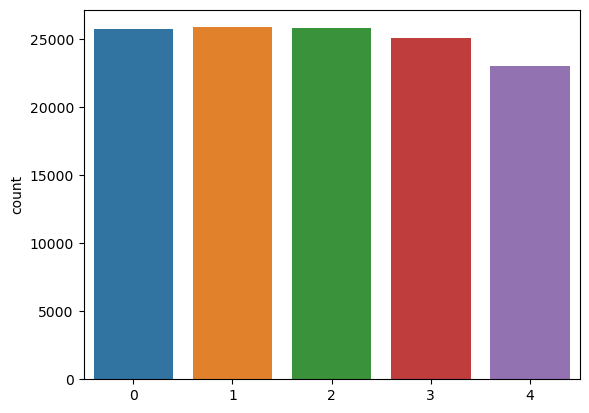

In [25]:
sns.countplot(label)

<bound method Figure.tight_layout of <Figure size 2000x2000 with 25 Axes>>

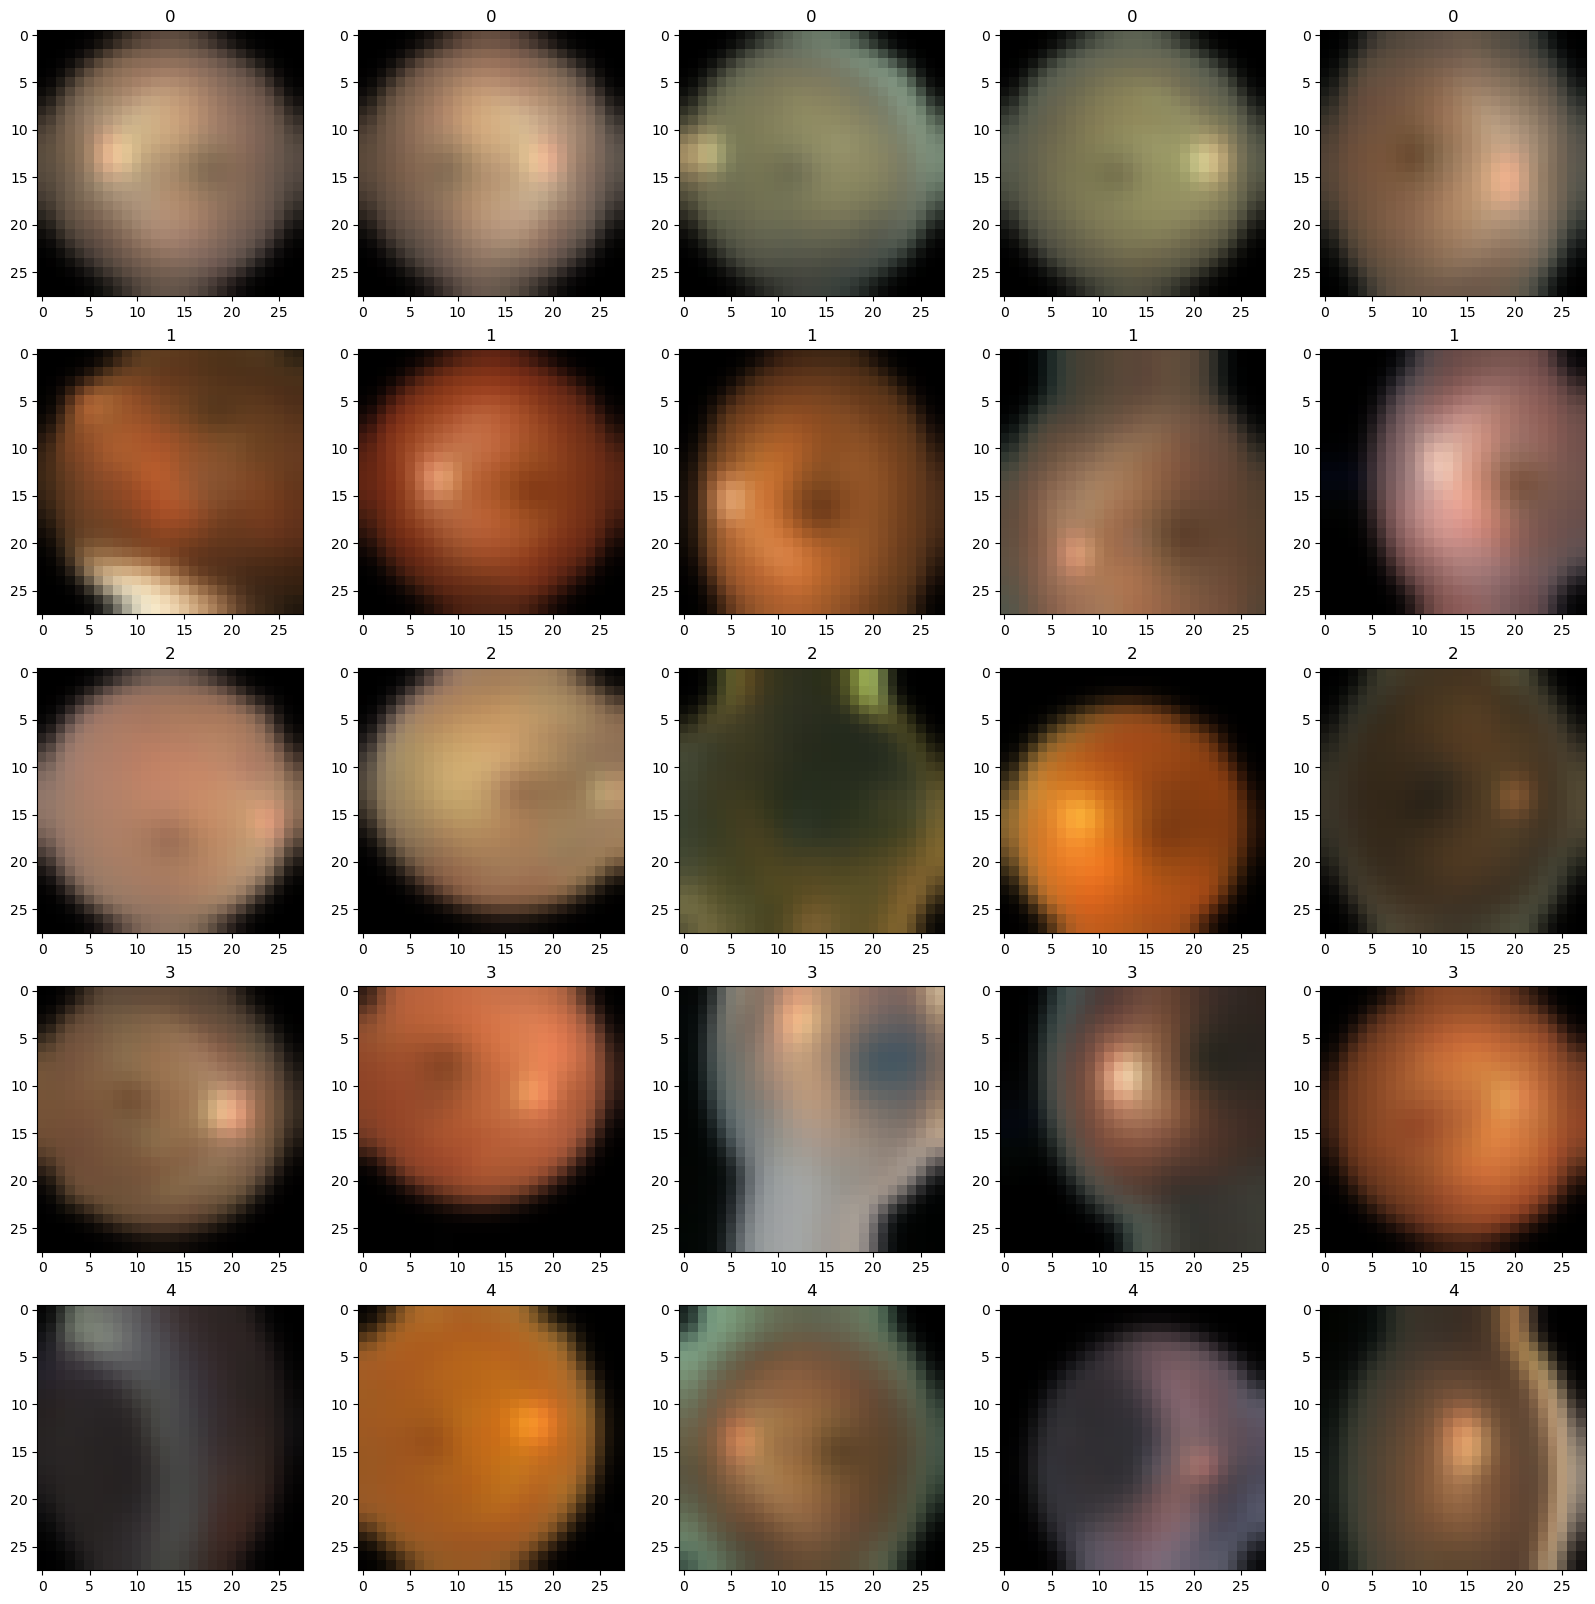

In [26]:
fig,axs=plt.subplots(5,5,figsize=(20,20))
count=0
for i in os.listdir('./data'):
    train_class=os.listdir(os.path.join('data',i))
    for j in range(5):
        img=os.path.join('data',i,train_class[j])
        img=PIL.Image.open(img)
        axs[count][j].title.set_text(i)
        axs[count][j].imshow(img)
    count+=1
fig.tight_layout

In [27]:
dr224_df=pd.DataFrame({'Image':data, 'Label':label})
dr224_df

,Image,Label
0,data\0\resized_resized_resized_resized_10003_l...,0
1,data\0\resized_resized_resized_resized_10003_r...,0
2,data\0\resized_resized_resized_resized_10007_l...,0
3,data\0\resized_resized_resized_resized_10007_r...,0
4,data\0\resized_resized_resized_resized_10009_l...,0
...,...,...
125751,data\4\resized_resized_resized_resized_7897_au...,4
125752,data\4\resized_resized_resized_resized_7898_au...,4
125753,data\4\resized_resized_resized_resized_7899_au...,4
125754,data\4\resized_resized_resized_resized_789_aug...,4


In [28]:
dr224_df.head()

,Image,Label
0,data\0\resized_resized_resized_resized_10003_l...,0
1,data\0\resized_resized_resized_resized_10003_r...,0
2,data\0\resized_resized_resized_resized_10007_l...,0
3,data\0\resized_resized_resized_resized_10007_r...,0
4,data\0\resized_resized_resized_resized_10009_l...,0


In [29]:
dr224_df.tail()

,Image,Label
125751,data\4\resized_resized_resized_resized_7897_au...,4
125752,data\4\resized_resized_resized_resized_7898_au...,4
125753,data\4\resized_resized_resized_resized_7899_au...,4
125754,data\4\resized_resized_resized_resized_789_aug...,4
125755,data\4\resized_resized_resized_resized_78_aug_...,4


In [30]:
dr224_df=shuffle(dr224_df)
dr224_df.head()

,Image,Label
124489,data\4\resized_resized_resized_resized_6760_au...,4
74185,data\2\resized_resized_resized_resized_6955_15...,2
39209,data\1\resized_resized_resized_resized_22068_0...,1
108114,data\4\resized_resized_resized_resized_14886_a...,4
92394,data\3\resized_resized_resized_resized_23343_a...,3


In [31]:
dr224_df.tail()

,Image,Label
85869,data\3\resized_resized_resized_resized_17471_a...,3
109743,data\4\resized_resized_resized_resized_16351_a...,4
13459,data\0\resized_resized_resized_resized_30803_l...,0
7384,data\0\resized_resized_resized_resized_21476_r...,0
30749,data\1\resized_resized_resized_resized_14454_a...,1


In [32]:
train,test=train_test_split(dr224_df,test_size=0.2)

In [33]:
train_datagen=ImageDataGenerator(
              rescale=1./255,
              shear_range=0.2,
              rotation_range=20,
              validation_split=0.2
)

In [34]:
test_datagen=ImageDataGenerator(rescale=1./255)

In [35]:
train_generator = train_datagen.flow_from_directory(
    directory='./data',
    target_size=(28,28),
    color_mode="rgb",
    class_mode="categorical",
    batch_size=32,
    subset='training')

Found 100607 images belonging to 5 classes.


In [36]:
validation_generator = train_datagen.flow_from_directory(
    directory='./data',
    target_size=(28,28),
    color_mode="rgb",
    class_mode="categorical",
    batch_size=32,
    subset='validation')

Found 25149 images belonging to 5 classes.


In [37]:
test_generator = test_datagen.flow_from_directory(
    directory='./data',
    target_size=(28,28),
    color_mode="rgb",
    class_mode="categorical",
    batch_size=32)

Found 125756 images belonging to 5 classes.


In [38]:
input_shape = (28,28,3)
X_input = Input(input_shape)
x = ZeroPadding2D((1,1))(X_input)
s1=x
shortcut = x   
x = Conv2D(filters=32, kernel_size=(1, 1), strides=(1,1))(x)
x = BatchNormalization()(x)
x = ReLU()(x) 
x = ZeroPadding2D((1,1))(x)
x = Conv2D(filters=32, kernel_size=(3, 3), strides=(2,2))(x)
x = BatchNormalization()(x)
x = ReLU()(x) 
x = Conv2D(filters=64, kernel_size=(1, 1), strides=(1, 1))(x)
x = BatchNormalization()(x) 
shortcut = Conv2D(filters=64, kernel_size=(1,1), strides=(2,2))(shortcut)
shortcut = BatchNormalization()(shortcut)
x = Add()([x, shortcut])
x = ReLU()(x)
#s2=x
shortcut = x   
x = Conv2D(filters=128, kernel_size=(1, 1), strides=(1,1))(x)
x = BatchNormalization()(x)
x = ReLU()(x) 
x = ZeroPadding2D((1,1))(x)
x = Conv2D(filters=128, kernel_size=(3, 3), strides=(2,2))(x)
x = BatchNormalization()(x)
x = ReLU()(x) 
x = Conv2D(filters=256, kernel_size=(1, 1), strides=(1, 1))(x)
x = BatchNormalization()(x) 
shortcut = Conv2D(filters=256, kernel_size=(1,1), strides=(2,2))(shortcut)
shortcut = BatchNormalization()(shortcut)
x = Add()([x, shortcut])
x = ReLU()(x)
shortcut = x
shortcut1 = Conv2D(filters=256, kernel_size=(1,1), strides=(4,4))(s1)
shortcut1 = BatchNormalization()(shortcut1)
shortcut1 = Add()([shortcut1,shortcut])
x=ReLU()(shortcut1)
x=AveragePooling2D((2,2))(x)
x=Flatten()(x)
x = Dense(5, activation = 'softmax')(x)
model = Model( inputs= X_input, outputs = x, name = 'Densenetmodifed')
model.summary()

Model: "Densenetmodifed"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 28, 28, 3)]  0           []                               
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, 30, 30, 3)   0           ['input_1[0][0]']                
                                                                                                  
 conv2d (Conv2D)                (None, 30, 30, 32)   128         ['zero_padding2d[0][0]']         
                                                                                                  
 batch_normalization (BatchNorm  (None, 30, 30, 32)  128         ['conv2d[0][0]']                 
 alization)                                                                         

                                                                                                  
 flatten (Flatten)              (None, 4096)         0           ['average_pooling2d[0][0]']      
                                                                                                  
 dense (Dense)                  (None, 5)            20485       ['flatten[0][0]']                
                                                                                                  
Total params: 243,685
Trainable params: 241,253
Non-trainable params: 2,432
__________________________________________________________________________________________________


In [39]:
model.compile(optimizer = 'adam', loss='categorical_crossentropy', metrics= ['accuracy'])


In [40]:
earlystopping = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=60)

In [41]:
checkpointer = ModelCheckpoint(filepath="dr_densenetmine28_final_relu__100.hdf5", verbose=1, save_best_only=True)

In [42]:
hist = model.fit(train_generator, steps_per_epoch = train_generator.n // 32, epochs = 100, validation_data= validation_generator, validation_steps= validation_generator.n // 32, callbacks=[checkpointer , earlystopping])

Epoch 1/100
3143/3143 [==============================] - ETA: 0s - loss: 1.3404 - accuracy: 0.4135
Epoch 1: val_loss improved from inf to 1.32383, saving model to dr_densenetmine28_final_relu__100.hdf5
3143/3143 [==============================] - 436s 138ms/step - loss: 1.3404 - accuracy: 0.4135 - val_loss: 1.3238 - val_accuracy: 0.4216
Epoch 2/100
3143/3143 [==============================] - ETA: 0s - loss: 1.2372 - accuracy: 0.4553
Epoch 2: val_loss improved from 1.32383 to 1.27487, saving model to dr_densenetmine28_final_relu__100.hdf5
3143/3143 [==============================] - 396s 126ms/step - loss: 1.2372 - accuracy: 0.4553 - val_loss: 1.2749 - val_accuracy: 0.4369
Epoch 3/100
3143/3143 [==============================] - ETA: 0s - loss: 1.2084 - accuracy: 0.4739
Epoch 3: val_loss improved from 1.27487 to 1.23664, saving model to dr_densenetmine28_final_relu__100.hdf5
3143/3143 [==============================] - 367s 117ms/step - loss: 1.2084 - accuracy: 0.4739 - val_loss: 1.236

3143/3143 [==============================] - 445s 142ms/step - loss: 0.6498 - accuracy: 0.7460 - val_loss: 0.9256 - val_accuracy: 0.6461
Epoch 55/100
3143/3143 [==============================] - ETA: 0s - loss: 0.6456 - accuracy: 0.7465
Epoch 55: val_loss did not improve from 0.92563
3143/3143 [==============================] - 476s 151ms/step - loss: 0.6456 - accuracy: 0.7465 - val_loss: 0.9608 - val_accuracy: 0.6360
Epoch 56/100
3143/3143 [==============================] - ETA: 0s - loss: 0.6399 - accuracy: 0.7493
Epoch 56: val_loss did not improve from 0.92563
3143/3143 [==============================] - 486s 155ms/step - loss: 0.6399 - accuracy: 0.7493 - val_loss: 0.9962 - val_accuracy: 0.6291
Epoch 57/100
3143/3143 [==============================] - ETA: 0s - loss: 0.6381 - accuracy: 0.7500
Epoch 57: val_loss did not improve from 0.92563
3143/3143 [==============================] - 492s 156ms/step - loss: 0.6381 - accuracy: 0.7500 - val_loss: 0.9461 - val_accuracy: 0.6495
Epoch 58

Epoch 83/100
3143/3143 [==============================] - ETA: 0s - loss: 0.5511 - accuracy: 0.7856
Epoch 83: val_loss did not improve from 0.87677
3143/3143 [==============================] - 434s 138ms/step - loss: 0.5511 - accuracy: 0.7856 - val_loss: 0.9490 - val_accuracy: 0.6627
Epoch 84/100
3143/3143 [==============================] - ETA: 0s - loss: 0.5504 - accuracy: 0.7857
Epoch 84: val_loss did not improve from 0.87677
3143/3143 [==============================] - 448s 143ms/step - loss: 0.5504 - accuracy: 0.7857 - val_loss: 0.9424 - val_accuracy: 0.6495
Epoch 85/100
3143/3143 [==============================] - ETA: 0s - loss: 0.5476 - accuracy: 0.7847
Epoch 85: val_loss did not improve from 0.87677
3143/3143 [==============================] - 453s 144ms/step - loss: 0.5476 - accuracy: 0.7847 - val_loss: 0.9235 - val_accuracy: 0.6627
Epoch 86/100
3143/3143 [==============================] - ETA: 0s - loss: 0.5427 - accuracy: 0.7880
Epoch 86: val_loss did not improve from 0.876

In [44]:
evaluate = model.evaluate(test_generator, steps = test_generator.n // 32, verbose =1)

print('Accuracy Test : {}'.format(evaluate[1]))

3929/3929 [==============================] - 212s 54ms/step - loss: 0.5301 - accuracy: 0.8018
Accuracy Test : 0.8018181920051575


In [45]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [46]:
labels = {0: '0',1:'1',2:'2',3:'3',4:'4'}

In [47]:
# Loading images and their predictions 
from sklearn.metrics import classification_report, accuracy_score
import cv2
prediction = []
original = []
image = []
count = 0
for i in range(len(test)):
  # code to open the image
  img= PIL.Image.open(test['Image'].tolist()[i])
  # resizing the image to (256,256)
  img = img.resize((28,28))
  # appending image to the image list
  image.append(img)
  # converting image to array
  img = np.asarray(img, dtype= np.float32)
  # normalizing the image
  img = img / 255
  # reshaping the image in to a 4D array
  img = img.reshape(-1,28,28,3)
  # making prediction of the model
  predict = model.predict(img)
  # getting the index corresponding to the highest value in the prediction
  predict = np.argmax(predict)
  # appending the predicted class to the list
  prediction.append(labels[predict])
  # appending original class to the list
  original.append(test['Label'].tolist()[i])


1/1 [==============================] - 0s 32ms/step


1/1 [==============================] - 0s 41ms/step


1/1 [==============================] - 0s 26ms/step


1/1 [==============================] - 0s 30ms/step


1/1 [==============================] - 0s 34ms/step


1/1 [==============================] - 0s 28ms/step


1/1 [==============================] - 0s 25ms/step


1/1 [==============================] - 0s 28ms/step


1/1 [==============================] - 0s 38ms/step


1/1 [==============================] - 0s 27ms/step


1/1 [==============================] - 0s 27ms/step


1/1 [==============================] - 0s 26ms/step


1/1 [==============================] - 0s 34ms/step


1/1 [==============================] - 0s 33ms/step


1/1 [==============================] - 0s 26ms/step


1/1 [==============================] - 0s 25ms/step


1/1 [==============================] - 0s 26ms/step


1/1 [==============================] - 0s 39ms/step


1/1 [==============================] - 0s 27ms/step


1/1 [==============================] - 0s 40ms/step


1/1 [==============================] - 0s 28ms/step


1/1 [==============================] - 0s 28ms/step


1/1 [==============================] - 0s 24ms/step


1/1 [==============================] - 0s 29ms/step


1/1 [==============================] - 0s 38ms/step


1/1 [==============================] - 0s 35ms/step


1/1 [==============================] - 0s 27ms/step


1/1 [==============================] - 0s 30ms/step


1/1 [==============================] - 0s 32ms/step


1/1 [==============================] - 0s 34ms/step


1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 41ms/step


1/1 [==============================] - 0s 38ms/step


1/1 [==============================] - 0s 32ms/step


1/1 [==============================] - 0s 35ms/step


1/1 [==============================] - 0s 35ms/step


1/1 [==============================] - 0s 44ms/step


1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 30ms/step


1/1 [==============================] - 0s 39ms/step


1/1 [==============================] - 0s 45ms/step


1/1 [==============================] - 0s 40ms/step


1/1 [==============================] - 0s 32ms/step


1/1 [==============================] - 0s 47ms/step


1/1 [==============================] - 0s 67ms/step


1/1 [==============================] - 0s 38ms/step


1/1 [==============================] - 0s 40ms/step


1/1 [==============================] - 0s 51ms/step


1/1 [==============================] - 0s 37ms/step


1/1 [==============================] - 0s 42ms/step


1/1 [==============================] - 0s 36ms/step


1/1 [==============================] - 0s 39ms/step


1/1 [==============================] - 0s 39ms/step


1/1 [==============================] - 0s 36ms/step


1/1 [==============================] - 0s 46ms/step


1/1 [==============================] - 0s 44ms/step


1/1 [==============================] - 0s 41ms/step


1/1 [==============================] - 0s 33ms/step


1/1 [==============================] - 0s 62ms/step


1/1 [==============================] - 0s 44ms/step


1/1 [==============================] - 0s 41ms/step


1/1 [==============================] - 0s 40ms/step


1/1 [==============================] - 0s 41ms/step


1/1 [==============================] - 0s 58ms/step


1/1 [==============================] - 0s 40ms/step


1/1 [==============================] - 0s 40ms/step


1/1 [==============================] - 0s 48ms/step


1/1 [==============================] - 0s 44ms/step


1/1 [==============================] - 0s 37ms/step


1/1 [==============================] - 0s 51ms/step


1/1 [==============================] - 0s 42ms/step


1/1 [==============================] - 0s 55ms/step


1/1 [==============================] - 0s 56ms/step


1/1 [==============================] - 0s 60ms/step


1/1 [==============================] - 0s 60ms/step


1/1 [==============================] - 0s 41ms/step


1/1 [==============================] - 0s 41ms/step


1/1 [==============================] - 0s 64ms/step


1/1 [==============================] - 0s 38ms/step


1/1 [==============================] - 0s 48ms/step


1/1 [==============================] - 0s 38ms/step


In [48]:
score = accuracy_score(original,prediction)
print("Test Accuracy : {}".format(score))

Test Accuracy : 0.8035543893129771


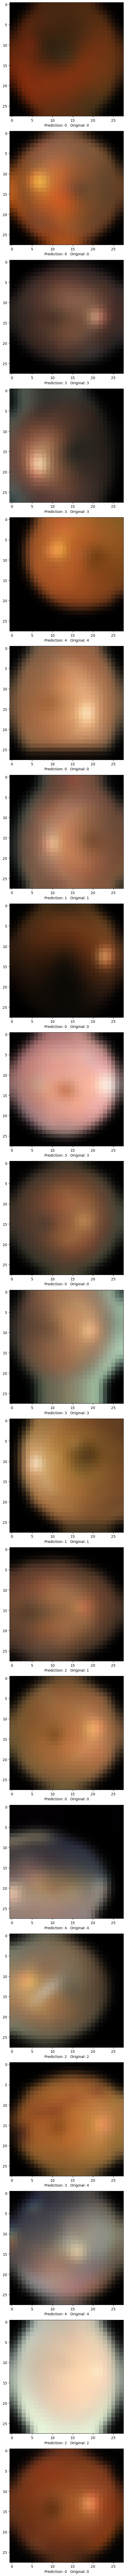

In [49]:
# Visualizing the results
import random
fig=plt.figure(figsize = (100,100))
for i in range(20):
    j = random.randint(0,len(image))
    fig.add_subplot(20, 1, i+1)
    plt.xlabel("Prediction: " + prediction[j] +"   Original: " + original[j])
    plt.imshow(image[j])
fig.tight_layout()
plt.show()

In [50]:
print(classification_report(np.asarray(original), np.asarray(prediction)))

              precision    recall  f1-score   support

           0       0.81      0.94      0.87      5143
           1       0.80      0.74      0.77      5309
           2       0.71      0.57      0.63      5037
           3       0.78      0.90      0.84      5005
           4       0.90      0.88      0.89      4658

    accuracy                           0.80     25152
   macro avg       0.80      0.80      0.80     25152
weighted avg       0.80      0.80      0.80     25152



In [51]:
from sklearn.metrics import confusion_matrix

Text(0.5, 1.0, 'Confusion_matrix')

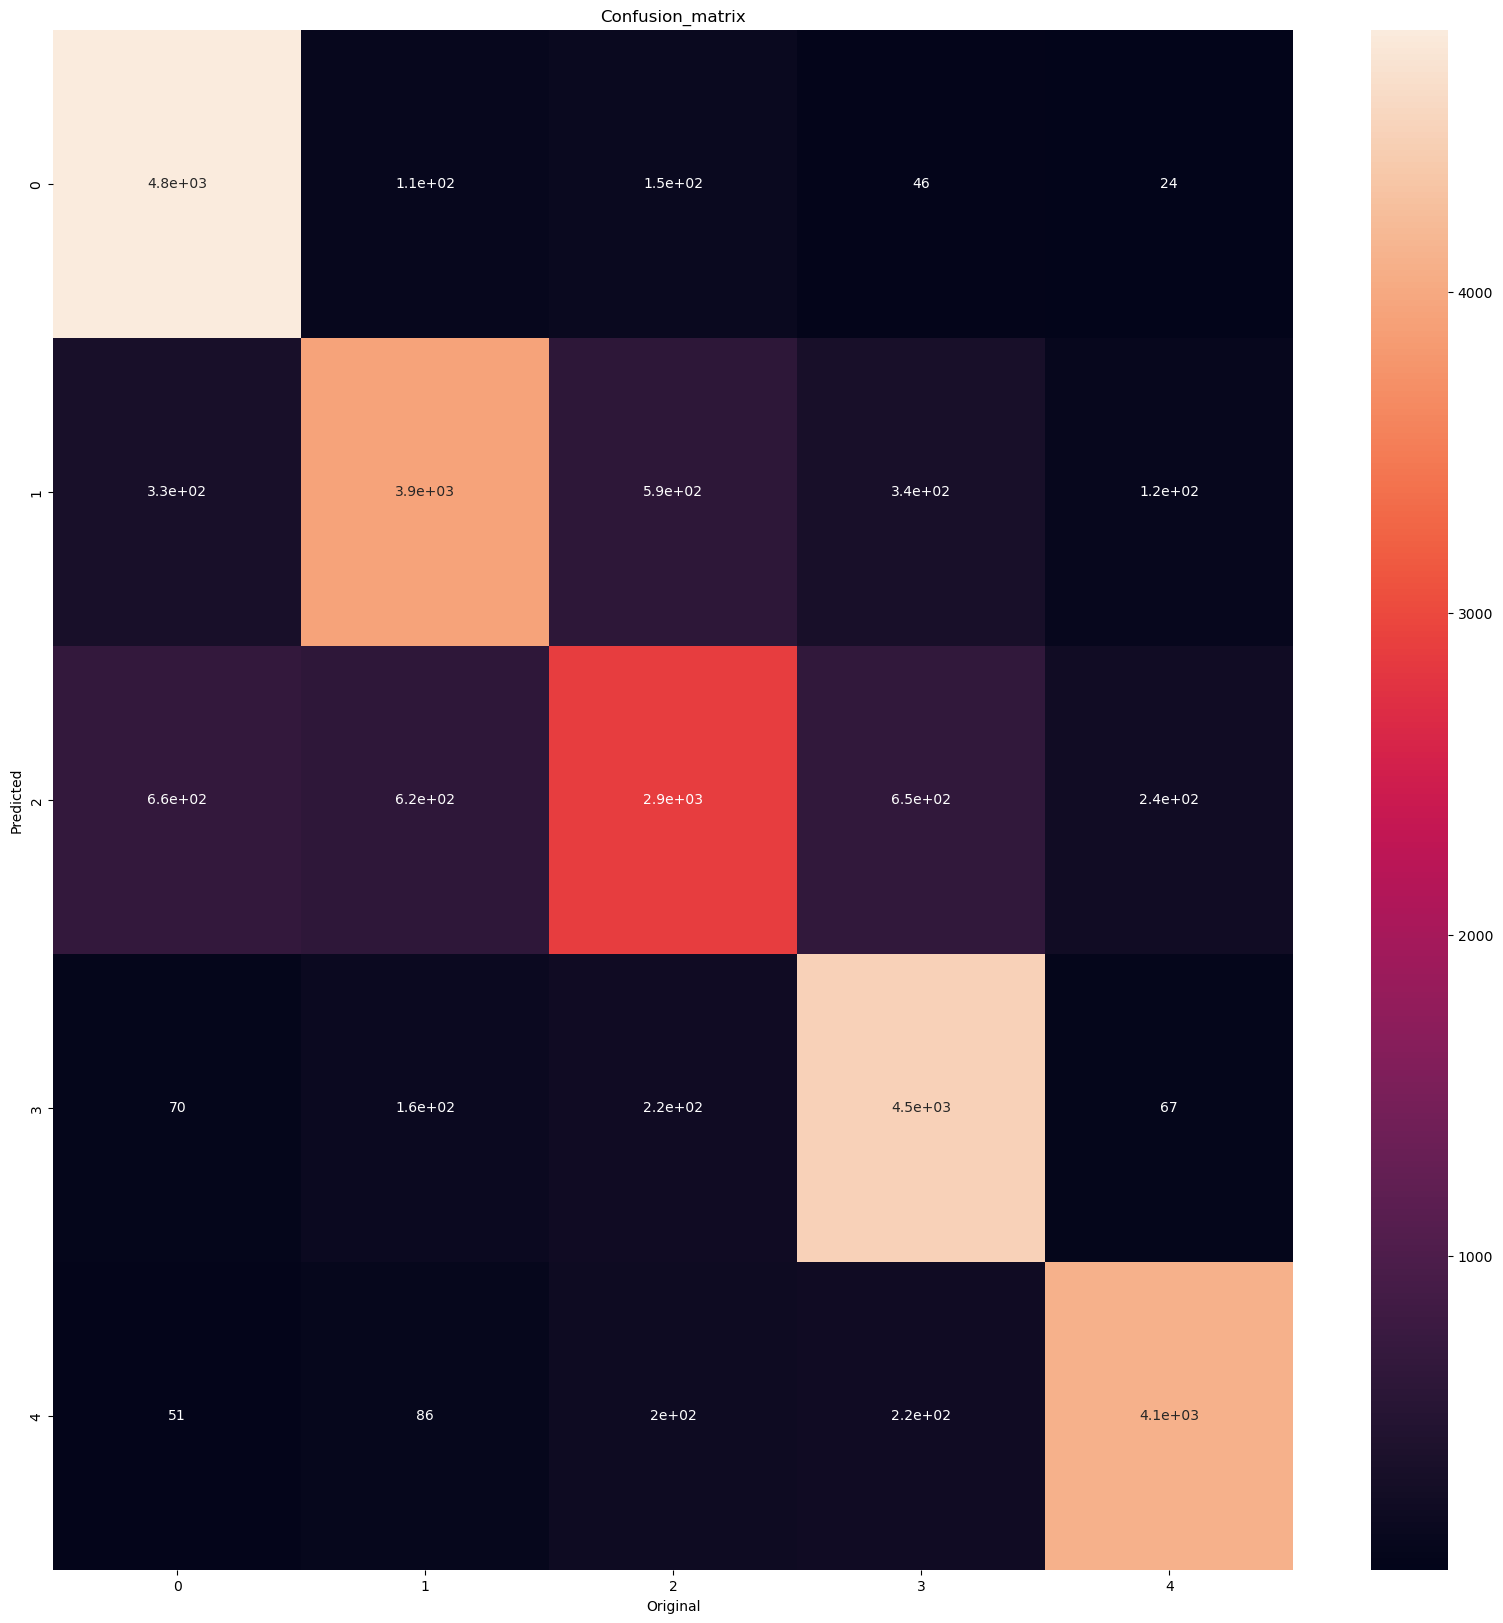

In [52]:
# plot the confusion matrix
plt.figure(figsize = (20,20))
cm = confusion_matrix(np.asarray(original), np.asarray(prediction))
ax = plt.subplot()
sns.heatmap(cm, annot = True, ax = ax)

ax.set_xlabel('Original')
ax.set_ylabel('Predicted')
ax.set_title('Confusion_matrix')


In [53]:
print(confusion_matrix(np.asarray(original), np.asarray(prediction)))

[[4816  106  151   46   24]
 [ 333 3927  590  342  117]
 [ 663  618 2874  647  235]
 [  70  156  219 4493   67]
 [  51   86  196  224 4101]]
